In [1]:
import pandas as pd
import numpy as np

In [2]:
df_total = pd.read_csv('../../data/metrics.csv', index_col=0)
df_total = df_total[(df_total.index.str.contains('2022')) | (df_total.index.str.contains('2023'))]# & (~df.index.str.contains('2021'))]
df_total['Random'] = df_total.apply(lambda x: np.random.choice(x), axis=1)
df_total['Oracle'] = df_total.max(axis=1)
#df_total

In [3]:
avg_ens = pd.read_csv('../../data/OBSEA/metrics/AVG_ENS/PR_AUC.csv', index_col=0)
df_total = df_total.join(avg_ens, how='inner')
#df_total

FileNotFoundError: [Errno 2] No such file or directory: '../../data/OBSEA/metrics/AVG_ENS/PR_AUC.csv'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AutoEncoder (AE)'),
  Text(1, 0, 'DenoisingAutoEncoder (DAE)'),
  Text(2, 0, 'PCC'),
  Text(3, 0, 'HBOS'),
  Text(4, 0, 'CBLOF'),
  Text(5, 0, 'COPOD'),
  Text(6, 0, 'RobustPCA'),
  Text(7, 0, 'LOF'),
  Text(8, 0, 'Random'),
  Text(9, 0, 'Oracle')])

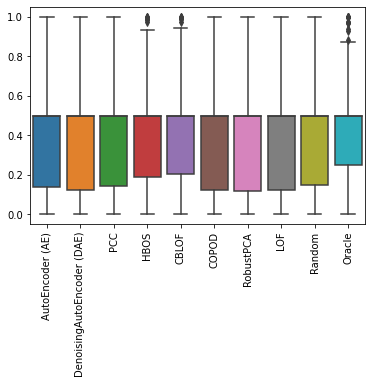

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df_total)
plt.xticks(rotation=90)

In [31]:
import os
import pandas as pd

#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work/results/votes_best/'
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work/results/votes_normalization/'
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work/results/votes_no-znorm_32/'
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work_sync/MSAD_work/results/votes/' # tsfresh
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work_sync/MSAD_work/results/votes_catch22/' # catch22
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work_sync/tmp/MSAD_work/results/votes2plot/' # catch22
#MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work_sync/tmp/MSAD_work/results/votes_tsfresh/'
MSAD_result_path = '/mnt/c/Arbeid/Github_Repo/MSAD_work_sync/tmp/MSAD_work/results/votes/final/'
df_MSAD_choices = None
df_MSAD_acc = None

for votes_result_file in os.listdir(MSAD_result_path):
    model_name = votes_result_file.split('.')[0]
    df_MSAD = pd.read_csv(MSAD_result_path + votes_result_file, index_col=1)
    df_MSAD.drop(columns=["Unnamed: 0"], inplace=True)
    df_MSAD.rename_axis("", inplace=True)
    df_MSAD.rename(columns={'choice': 'MuMSAD-' + model_name + '-choice'}, inplace=True)
    if df_MSAD_choices is None:
        df_MSAD_choices = df_MSAD.copy()
        df_MSAD_acc = df_MSAD.copy()
    else:
        df_MSAD_choices = df_MSAD_choices.join(df_MSAD, how='inner')
        df_MSAD_acc = df_MSAD_acc.join(df_MSAD, how='inner')
        
df_MSAD_acc

,MuMSAD-convnet_default_128-choice,MuMSAD-convnet_default_16-choice,MuMSAD-convnet_default_256-choice,MuMSAD-convnet_default_32-choice,MuMSAD-convnet_default_512-choice,MuMSAD-convnet_default_64-choice,MuMSAD-convnet_default_768-choice,MuMSAD-inception_time_default_128-choice,MuMSAD-inception_time_default_16-choice,MuMSAD-inception_time_default_256-choice,...,MuMSAD-sit_stem_original_512-choice,MuMSAD-sit_stem_original_64-choice,MuMSAD-sit_stem_original_768-choice,MuMSAD-sit_stem_relu_128-choice,MuMSAD-sit_stem_relu_16-choice,MuMSAD-sit_stem_relu_256-choice,MuMSAD-sit_stem_relu_32-choice,MuMSAD-sit_stem_relu_512-choice,MuMSAD-sit_stem_relu_64-choice,MuMSAD-sit_stem_relu_768-choice
,,,,,,,,,,,,,,,,,,,,,
OBSEA/2023-10-21.out,0,7,0,1,6,7,7,7,3,3,...,7,7,0,0,0,7,0,0,0,7
OBSEA/2023-11-06.out,0,0,0,0,4,0,0,7,3,3,...,0,0,0,0,0,0,3,0,0,7
OBSEA/2022-03-15.out,0,0,0,0,4,0,0,5,3,3,...,0,0,0,0,0,0,3,0,0,0
OBSEA/2022-03-02.out,0,0,0,0,4,0,0,7,3,3,...,0,0,0,0,0,0,3,0,0,4
OBSEA/2022-03-28.out,6,6,0,0,7,6,0,5,0,3,...,0,0,6,0,3,4,4,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OBSEA/2022-09-21.out,7,7,7,6,7,7,7,7,2,6,...,7,6,7,7,7,7,6,6,6,7
OBSEA/2023-02-21.out,6,6,6,6,4,5,1,5,0,3,...,0,0,0,0,1,5,3,5,4,0
OBSEA/2022-03-20.out,6,6,6,6,4,6,0,5,0,3,...,0,0,1,0,6,4,3,2,6,0


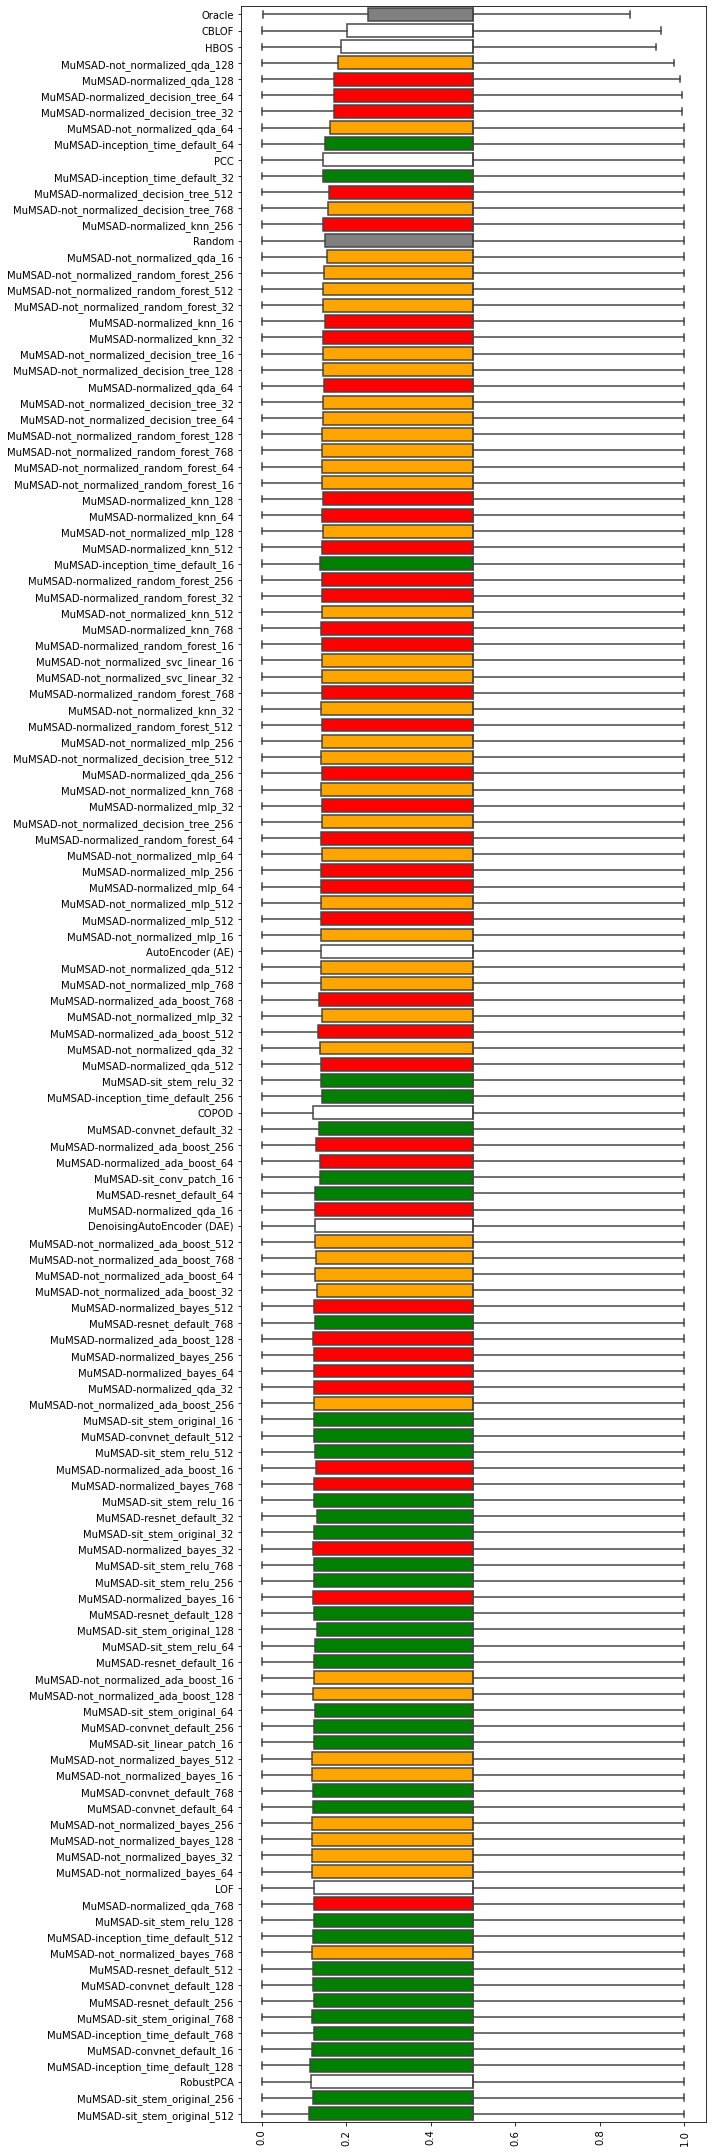

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import pandas as pd

def update_acc(row, column):
    column_index = int(row[column])
    if column_index < 0 or column_index >= len(df_total.columns):
        return None  # or some default value, e.g., np.nan
    column_name = df_total.columns[column_index]
    value = row[column_name]
    return value

# Assuming df_total and df_MSAD_acc are predefined DataFrames
df_acc = df_total.join(df_MSAD_acc, how='inner')
for col in df_MSAD_acc.columns:
    df_acc[col] = df_acc.apply(lambda row: update_acc(row, col), axis=1)
df_acc.columns = df_acc.columns.str.replace('-choice', '')

# Compute medians and quartiles
medians = df_acc.median()
means = df_acc.mean()
q1 = df_acc.quantile(0.25)
q3 = df_acc.quantile(0.75)
stds = df_acc.std()

# Create a DataFrame for sorting
stats_df = pd.DataFrame({
    'mean': means,
    'q1': q1,
    'std': stds
})

# Sort by median, then by Q1, then by Q3
sorted_stats = stats_df.sort_values(by=['mean', 'std'], ascending=[False, True])
sorted_columns = sorted_stats.index
df_sorted = df_acc[sorted_columns]
df_acc = df_sorted

plt.figure(figsize=(10, 30))  
ax = sns.boxplot(data=df_acc, showfliers=False, orient='h')  

detector_names = [
    'AutoEncoder (AE)',
    'DenoisingAutoEncoder (DAE)',     
    #'DeepAnT', 
    #'Random Black Forest (RR)', 
    'PCC', 
    'HBOS', 
    #'Torsk', 
    #'EncDec-AD', 
    #'Hybrid KNN',
    'CBLOF', 
    'COPOD', 
    'RobustPCA', 
    'LOF'
]
theoritical_models = ['Oracle', 'Random', 'AVG_ENS']
deep_models = ['convnet', 'inception', 'sit', 'resnet']

boxes = [patch for patch in ax.patches if isinstance(patch, PathPatch)]
if len(boxes) == len(df_acc.columns):
    for i, box in enumerate(boxes):
        col_name = df_acc.columns[i]
        if col_name in detector_names:
            box.set_facecolor('white')
        elif col_name in theoritical_models:
            box.set_facecolor('gray')
        elif any(deep_model_shortname in col_name for deep_model_shortname in deep_models):
            box.set_facecolor('green')
        elif "not_normalized" in col_name:
            box.set_facecolor('orange')
        else:
            box.set_facecolor('red')  # Or any other default color

plt.xticks(rotation=90)
plt.tight_layout()
#plt.show()
plt.savefig('acc.png')


In [40]:
df_acc.describe().T

,count,mean,std,min,25%,50%,75%,max
Oracle,531.0,0.407743,0.195740,0.002032,0.251653,0.5,0.5,1.0
CBLOF,531.0,0.381902,0.197116,0.000478,0.202097,0.5,0.5,1.0
HBOS,531.0,0.374439,0.206436,0.000353,0.188482,0.5,0.5,1.0
MuMSAD-not_normalized_qda_128,531.0,0.370974,0.202457,0.000478,0.179363,0.5,0.5,1.0
MuMSAD-normalized_qda_128,531.0,0.367640,0.206786,0.000071,0.171830,0.5,0.5,1.0
...,...,...,...,...,...,...,...,...
MuMSAD-convnet_default_16,531.0,0.340383,0.218501,0.000465,0.118103,0.5,0.5,1.0
MuMSAD-inception_time_default_128,531.0,0.339690,0.217265,0.000465,0.114154,0.5,0.5,1.0
RobustPCA,531.0,0.339204,0.220658,0.000407,0.116780,0.5,0.5,1.0
MuMSAD-sit_stem_original_256,531.0,0.337879,0.217759,0.000071,0.120878,0.5,0.5,1.0


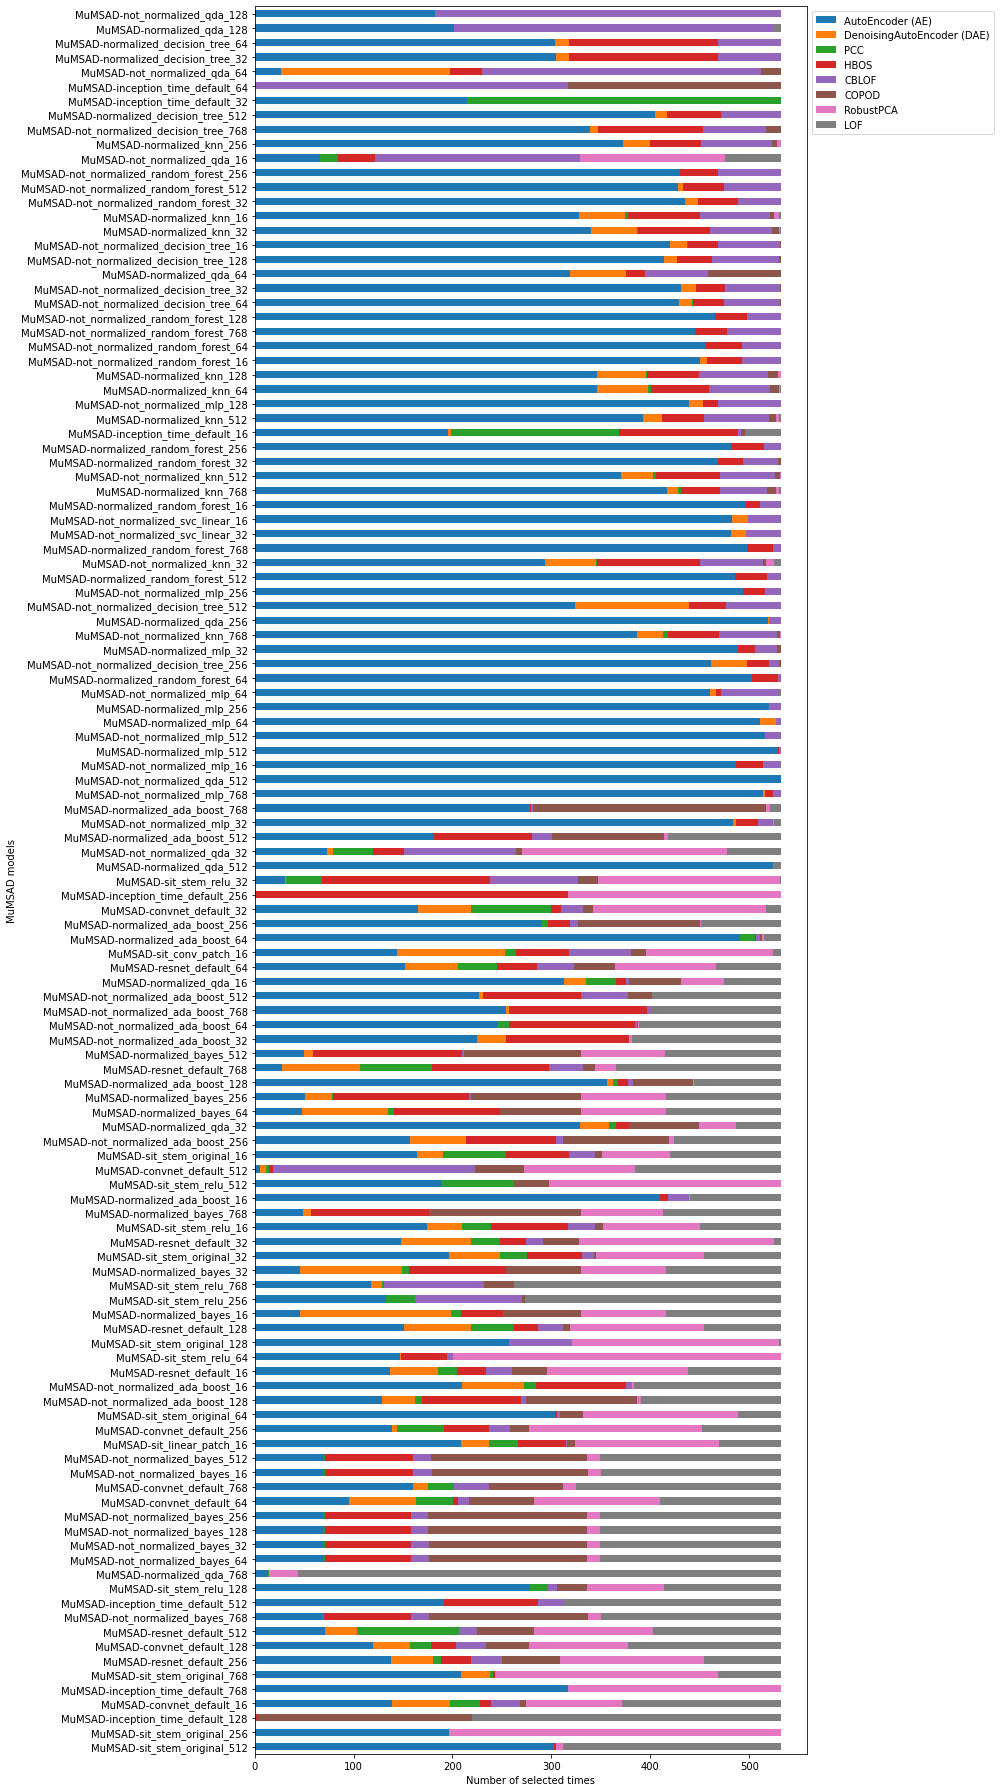

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

new_order_col = [x for x in list(df_acc.columns) if 'MuMSAD' in x][::-1]
new_order_col
df = df_MSAD_choices
df.columns = df.columns.str.replace('-choice', '')
df = df[new_order_col]

value_counts_dict = {}
for column in df.columns:
    value_counts_dict[column] = df[column].value_counts()

value_counts_df = pd.DataFrame(value_counts_dict).fillna(0)
value_counts_df = value_counts_df.transpose()

ax = value_counts_df.plot(kind='barh', stacked=True, figsize=(14, 25))

label_mapping = {} 
for i in range(len(detector_names)):
    label_mapping[str(i)] = detector_names[i]

handles, labels = ax.get_legend_handles_labels()
new_labels = [label_mapping.get(label, label) for label in labels]

# Adjust legend location
ax.legend(handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1.0))

plt.ylabel('MuMSAD models')
plt.xlabel('Number of selected times')
plt.tight_layout()
#plt.show()
plt.savefig('choice.png')
